# Faulty State-Space Search Method Comparison

The goal of this notebook is to demonstrate the performance of evolutionary search methods on the hazard elicitation problem. The methods to compare are:
- monte_carlo (a random search)
- evolutionary algorithm
- cooperative coevolutionary algorithm

These methods have been coded up using the ``deap`` simulation package in ``search_rover.py``. 

In [1]:
from search_rover import *
import pandas as pd

An experiment can be run calling the following methods:

MC PERFORMANCE:


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [04:13<00:00,  5.06s/it]


Best Fitness: 0.44765907349504164
EA PERFORMANCE:


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [04:44<00:00,  5.70s/it]


Best Fitness: 0.45991476941620624
CCEA PERFORMANCE:


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [05:00<00:00,  6.00s/it]


Best Fitness: 0.5116345123278048


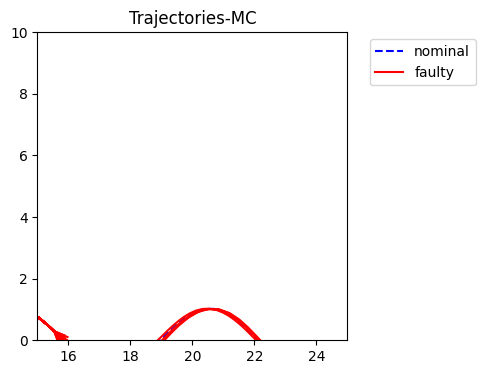

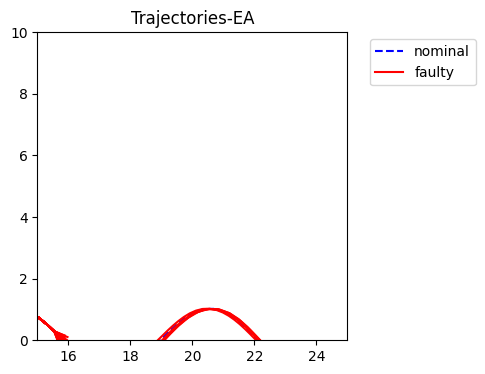

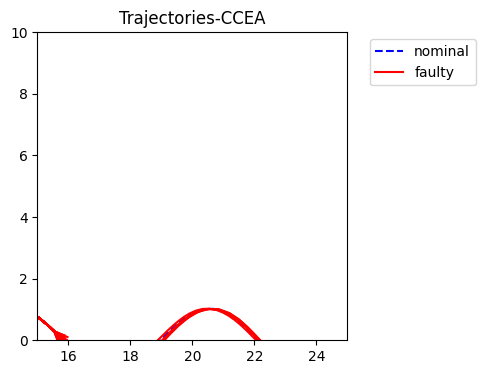

In [2]:
result_mc, sol_mc= montecarlo(ngen=50, weight=0.5, filename='results/rslt_random.csv')
result_ea, sol_ea= ea(ngen=50, weight=0.5, filename='results/rslt_ea.csv')
result_ccea, sol_ccea, pop= ccea(ngen=50, weight=0.5, filename="results/rslt_ccea.csv")

Alternatively, we can pull this data from saves:

In [3]:
dfrand = pd.read_csv('results/rslt_random.csv')
dfea = pd.read_csv('results/rslt_ea.csv')
dfccea = pd.read_csv("results/rslt_ccea.csv")

This shows the computational performance of (one run) of these methods:

C:\Users\dhulse\AppData\Roaming\Python\Python310\site-packages\pandas\plotting\_matplotlib\core.py:1258: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0.5, 1.0, 'Search Performance Comparison')

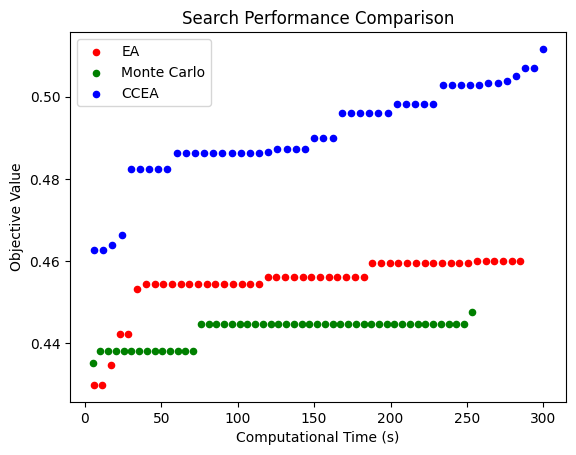

In [4]:
# scatter plot
ax = dfea.plot(x='time', y= 'EA Fitness Values',c='r', kind='scatter', label='EA')
dfrand.plot(x='time', y='Random Fitness Values', kind='scatter', ax=ax, c='g', label='Monte Carlo')
dfccea.plot(x='time', y='CCEA Fitness Values', kind='scatter', ax=ax, c='b', label='CCEA')
 
# set the title

plt.ylabel("Objective Value")
plt.xlabel("Computational Time (s)")
plt.title("Search Performance Comparison")

In [5]:
sol_ea = eval(dfea["EA Health States"].iloc[-1])
sol_mc = eval(dfrand["Random Health States"].iloc[-1])
sol_ccea = eval(dfccea["Best_Sol"].iloc[-1])
sols = {"Monte Carlo":sol_mc, "Evolutionary Algorithm":sol_ea, "Cooperative Coevolution":sol_ccea}

AttributeError: 'function' object has no attribute 'multiplot_legend_title'

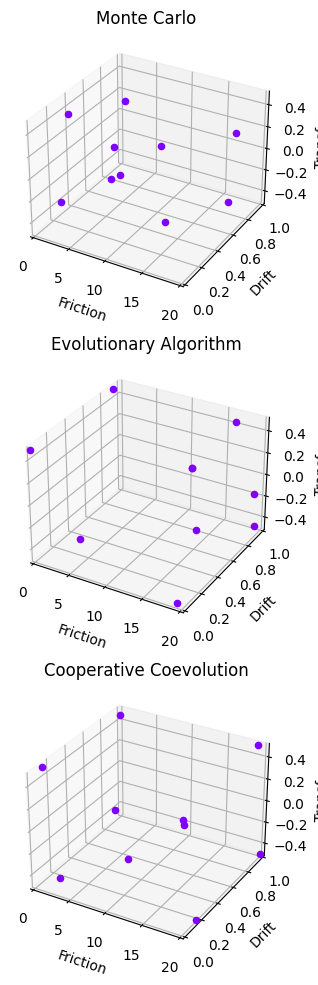

In [6]:
fig = plot_hspaces(sols)

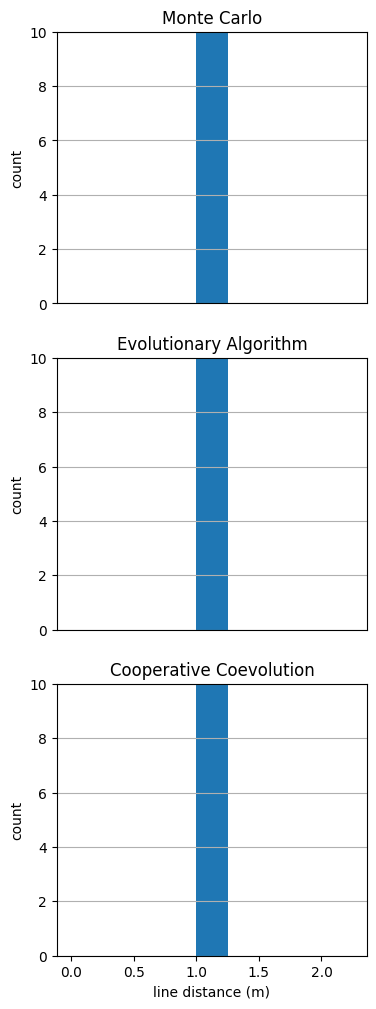

In [7]:
fig = plot_line_dist(sols)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


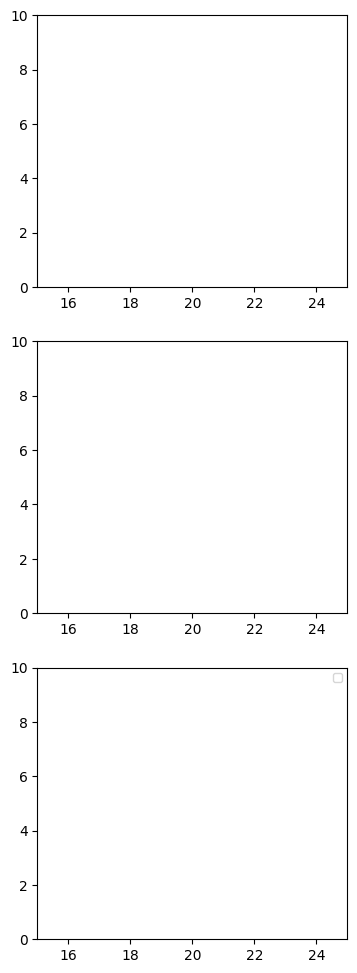

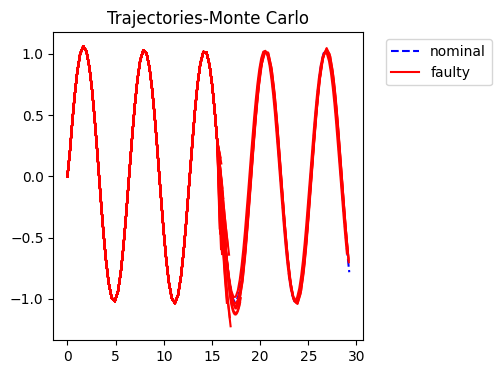

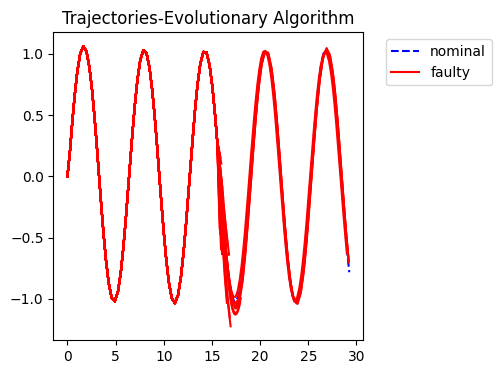

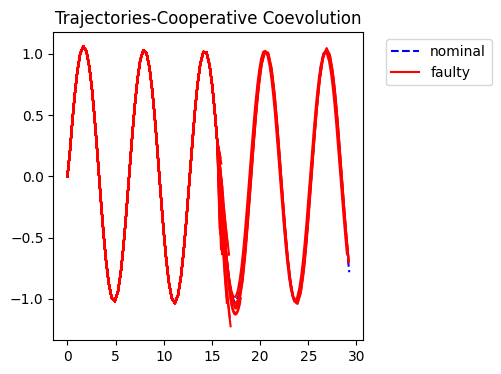

In [8]:
fig = plot_trajs(sols)

## Performance Comparison

Comparing algorithm performance over 20 replicates, 100 (50 CCEA) generations,  weight=0.5.

Estimated time = 3 mins * 3 types * 20 replicates = 180 minutes (3 hours).

In [9]:
num_replicates = 20

In [10]:
for i in range(num_replicates):
    result_mc, sol_mc= montecarlo(ngen=100, weight=0.5, filename="results/result_mc_"+str(i)+".csv", show_sol=False)
    result_ea, sol_ea= ea(ngen=100, weight=0.5, filename="results/result_ea_"+str(i)+".csv", show_sol=False)
    result_ccea, sol_ccea, pop= ccea(ngen=100, weight=0.5, filename="results/result_ccea_"+str(i)+".csv", show_sol=False)

MC PERFORMANCE:


  3%|██▍                                                                               | 3/100 [00:16<08:49,  5.46s/it]


KeyboardInterrupt: 

Loading results from saves:

In [11]:
dfs_mc, dfs_ea, dfs_ccea = [], [], []
for i in range(num_replicates):
    dfs_mc.append(pd.read_csv("results/result_mc_"+str(i)+".csv"))
    dfs_ea.append(pd.read_csv("results/result_ea_"+str(i)+".csv"))
    dfs_ccea.append(pd.read_csv("results/result_ccea_"+str(i)+".csv"))

Plotting results:

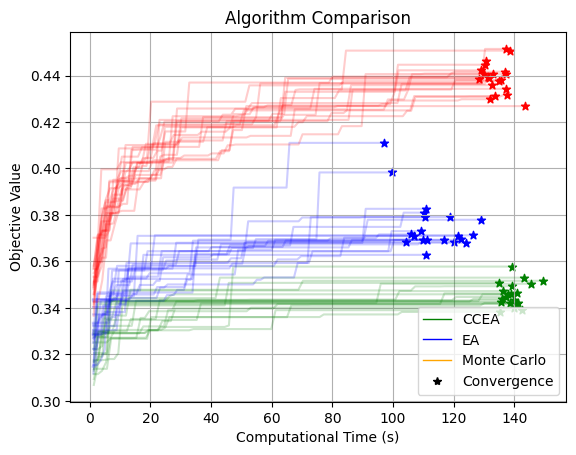

In [12]:
from matplotlib.lines import Line2D
dfs = [dfea, dfrand, dfccea]
for i, hist in enumerate(dfs_mc):
    plt.plot(hist['time'], hist['Random Fitness Values'], color='green', label="MC", alpha=0.2)
    plt.scatter(hist['time'].iloc[-1], hist['Random Fitness Values'].iloc[-1],  color='green', marker="*")
for i, hist in enumerate(dfs_ea):
    plt.plot(hist['time'], hist['EA Fitness Values'], color='blue', label="EA", alpha=0.2)
    plt.scatter(hist['time'].iloc[-1], hist['EA Fitness Values'].iloc[-1],  color='blue', marker="*")
for i, hist in enumerate(dfs_ccea):
    plt.plot(hist['time'], hist['CCEA Fitness Values'], color='red', label="CCEA", alpha=0.2)
    plt.scatter(hist['time'].iloc[-1], hist['CCEA Fitness Values'].iloc[-1],color='red', marker="*")
plt.legend()
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.get_legend().remove()
by_label = dict(zip(labels, handles))


legend_elements = [Line2D([0], [0], color='green', lw=1, label='CCEA'),
                   Line2D([0], [0], color='blue', lw=1, label='EA'),
                   Line2D([0], [0], color='orange', lw=1, label='Monte Carlo'),
                   Line2D([0], [0], marker='*', color='black', label='Convergence',
                          markerfacecolor='black',linestyle = 'None')]

ax.legend(handles=legend_elements)
#ax.legend(by_label.values(), by_label.keys(), prop={'size': 8})
plt.title("Algorithm Comparison")
plt.ylabel("Objective Value")
#plt.yscale("log")
plt.xlabel("Computational Time (s)")
plt.grid()
fig = plt.gcf()

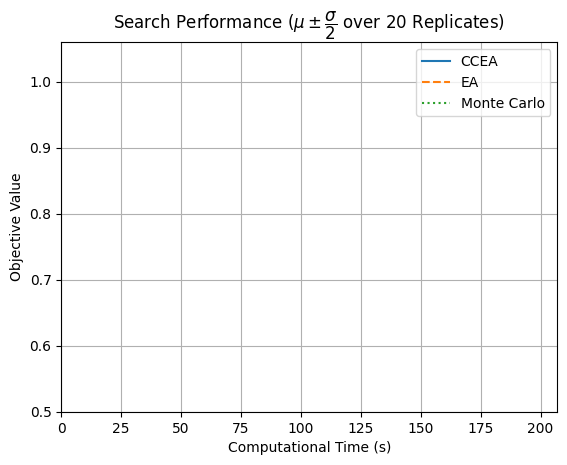

In [13]:
mean_ea = np.mean([df['EA Fitness Values'] for df in dfs_ea],0)
times_ea = np.mean([df['time'] for df in dfs_ea],0)
std_ea = np.std([df['EA Fitness Values'] for df in dfs_ea],0)
mean_ccea = np.mean([df['CCEA Fitness Values'] for df in dfs_ccea],0)
times_ccea = np.mean([df['time'] for df in dfs_ccea],0)
std_ccea = np.std([df['CCEA Fitness Values'] for df in dfs_ccea],0)
mean_mc = np.mean([df['Random Fitness Values'] for df in dfs_mc],0)
times_mc = np.mean([df['time'] for df in dfs_mc],0)
std_mc = np.std([df['Random Fitness Values'] for df in dfs_mc],0)


plt.plot(times_ccea, mean_ccea, label="CCEA")
ax = plt.gca()
ax.fill_between(times_ccea,mean_ccea-std_ccea, mean_ccea+std_ccea, alpha=0.3)
plt.plot(times_ea, mean_ea, label="EA", linestyle='--')
ax.fill_between(times_ea,mean_ea-std_ea, mean_ea+std_ea, alpha=0.3)
plt.plot(times_mc, mean_mc, label="Monte Carlo", linestyle=':')
ax.fill_between(times_mc,mean_mc-std_mc, mean_mc+std_mc, alpha=0.3)
plt.legend()
plt.title("Search Performance ($\mu \pm \dfrac{\sigma}{2}$ over 20 Replicates)")
plt.ylabel("Objective Value")
#plt.yscale("log")
plt.xlabel("Computational Time (s)")
plt.grid()
fig = plt.gcf()
plt.xlim([0,207])
plt.ylim([0.5,1.06])
fig = plt.gcf()

In [14]:
fig.savefig("alg_perf_comp.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)

## Comparing Solutions over weights - Fault-Space Formulation

Comparing results over weights given the goal is to explore the faulty state-space.

3 mins * 5 weights = 15 mins

In [15]:
weights = [0.0, 0.25, 0.5, 0.75, 1.0]

In [16]:
for i, w in enumerate(weights):
    result_ccea, sol_ccea, pop= ccea(ngen=100, weight=w, filename="results/result_weight_"+str(i)+".csv", show_sol=False)

Load Results

In [17]:
weight_sols = {}; weight_results = {}
for i, w in enumerate(weights):
    results = pd.read_csv("results/result_weight_"+str(i)+".csv")
    weight_sols["w="+str(w)] = eval(results["Best_Sol"].iloc[-1])

In [18]:
fig = plot_hspaces(weight_sols, v_padding=0.6)

In [19]:
fig.savefig("form1_fs_comp.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)

In [20]:
fig = plot_line_dist(weight_sols)

In [21]:
fig.savefig("form1_ld_comp.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)

In [22]:
fig = plot_trajs(weight_sols, v_padding=0.35)

In [23]:
fig.savefig("form1_traj_comp.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)

In [24]:
line_dists = [sum([line_dist_faster(i)[0] for i in sol]) for sol in weight_sols.values()]

In [25]:
hs_dists = [f_2(sol) for sol in weight_sols.values()]

In [26]:
plt.scatter(line_dists, hs_dists, color='red')
for i,name in enumerate(weight_sols):
    plt.annotate(name, (line_dists[i], hs_dists[i]))
plt.xlabel("Sum of Line Distance")
plt.ylabel("Sum of Min Health State Separation")
plt.title("Revealed Pareto Front - Formulation 1")
plt.grid()
fig = plt.gcf()

In [27]:
fig.savefig("form1_fs_pareto.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)

### Multiplicative Formulation


In [28]:
result_ccea_1, sol_ccea_1, pop_1= ccea(ngen=100,  formulation=12, filename="results/result12_weight_.csv", show_sol=False)

In [29]:
visualizations(sol_ccea_1, method="CCEA-mult1")

In [30]:
fig=plot_hspace([sol_ccea_1])

In [31]:
linedists = [s.linedist for s in sol_ccea_1]
plt.hist(linedists, bins=[j for j in np.arange(0,2.5, 0.25)])
plt.title("CCEA-Mult1 Formulation")
plt.grid(axis="y")
plt.ylim([0,10])

In [32]:
line_dist_mult = f_1(sol_ccea_1)
point_dist_mult = f_2(sol_ccea_1)

In [33]:
plt.scatter(line_dists, hs_dists, color='blue')
for i,name in enumerate(weight_sols):
    plt.annotate(name, (line_dists[i], hs_dists[i]))
plt.xlabel("Sum of Line Distance")
plt.ylabel("Sum of Min Health State Separation")
plt.title("Pareto")
plt.grid()

plt.scatter([line_dist_mult], [point_dist_mult], color='red')
plt.annotate('mult', (line_dist_mult, point_dist_mult))
plt.xlabel("Sum of Line Distance")
plt.ylabel("Sum of Min Health State Separation")

As shown, the multiplicative formulation produces degenerate results, placing all weight on a single point instead of producing points that are both spread out and hazardous.

## Comparing Solutions over weights - Result-Space Formulation

Comparing results over weights given the goal is to uncover new trajectories.

3 mins * 5 weights = 15 mins

In [34]:
weights = [0.0, 0.25, 0.5, 0.75, 1.0]

In [35]:
for i, w in enumerate(weights):
    result_ccea, sol_ccea, pop= ccea(ngen=100, weight=w, formulation=2, filename="results/result2_weight_"+str(i)+".csv", show_sol=False)

In [36]:
weight_sols = {}; weight_results = {}
for i, w in enumerate(weights):
    results = pd.read_csv("results/result2_weight_"+str(i)+".csv")
    weight_sols["w="+str(w)] = eval(results["Best_Sol"].iloc[-1])

In [37]:
fig = plot_hspaces(weight_sols, v_padding=0.6)

In [38]:
fig.savefig("form2_fs_comp.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)

In [39]:
fig = plot_line_dist(weight_sols)

In [40]:
fig.savefig("form2_ld_comp.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)

In [41]:
fig = plot_trajs(weight_sols, v_padding=0.35)

In [42]:
fig.savefig("form2_traj_comp.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)

In [43]:
class ind(list):
    def __init__(self):
        self.endpt=[]

In [44]:
for w, sol in weight_sols.items():
    for index, i in enumerate(sol):
        new_i = ind()
        for j in i:
            new_i.append(j)
            new_i.endpt = line_dist_faster(i)[2] 
        weight_sols[w][index]=new_i

In [45]:
line_dists = [sum([line_dist_faster(i)[0] for i in s]) for s in weight_sols.values()]
d_dists = [f_4(sol) for sol in weight_sols.values()]

In [46]:
plt.scatter(line_dists, d_dists, color='red')
for i,name in enumerate(weight_sols):
    plt.annotate(name, (line_dists[i], d_dists[i]))
plt.xlabel("Sum of Line Distance")
plt.ylabel("Sum of Min Result State Separation")
plt.title("Revealed Pareto Front - Formulation 2")
plt.grid()
fig = plt.gcf()

In [47]:
fig.savefig("form2_fs_pareto.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)

In [48]:
result_ccea_2, sol_ccea_2, pop_2= ccea(ngen=100,  formulation=22, filename="results/result22_weight_.csv", show_sol=False)

In [49]:
visualizations(sol_ccea_2, method="CCEA-mult")

In [50]:
fig=plot_hspace([sol_ccea_2])

In [51]:
linedists = [s.linedist for s in sol_ccea_2]
plt.hist(linedists, bins=[j for j in np.arange(0,2.5, 0.25)])
plt.title("CCEA-Mult2 Formulation")
plt.grid(axis="y")
plt.ylim([0,10])

In [52]:
plt.scatter(line_dists, d_dists, color='red')
for i,name in enumerate(weight_sols):
    plt.annotate(name, (line_dists[i], d_dists[i]))
plt.xlabel("Sum of Line Distance")
plt.ylabel("Sum of Min Result State Separation")
plt.title("Pareto")
plt.grid()

In [53]:
line_dist_mult = f_1(sol_ccea_2)
point_dist_mult = f_4(sol_ccea_2)

In [54]:
plt.scatter(line_dists, d_dists, color='blue')
for i,name in enumerate(weight_sols):
    plt.annotate(name, (line_dists[i], d_dists[i]))
plt.xlabel("Sum of Line Distance")
plt.ylabel("Sum of Min Result State Separation")
plt.title("Pareto")
plt.grid()

plt.scatter([line_dist_mult], [point_dist_mult], color='red')
plt.annotate('mult', (line_dist_mult, point_dist_mult))
plt.xlabel("Sum of Line Distance")
plt.ylabel("Sum of Min Health State Separation")

As with the previous objective, the solutions produced appear degenerate in terms of objectives. Qualitatively, however, the results look "good" with both a wide range of trajectories and points with a high line distance.